In [ ]:
get_ipython().system('python -m pip install --upgrade pip')
import pandas as pd
import numpy as np
from numpy import sin,cos,exp,sqrt,abs,sign,sinh,cosh,log,log10,pi,e
import seaborn as sns
# get_ipython().system('pip install plotly.py')
get_ipython().system('pip install xarray')
get_ipython().system('pip install datashader')
get_ipython().system('pip install geoviews')
get_ipython().system('pip install plotly')
# import plotly.py as pl
# import plotly.express as px
# import plotly.graph_objs as go
import matplotlib.pyplot as plt
import scipy.stats as stats
import panel as pn
pn.extension('plotly');
pn.extension('katex');
pn.extension()
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from holoviews.streams import RangeXY
from holoviews.operation.datashader import rasterize, shade
import param
from bokeh.plotting import curdoc
from bokeh.models import DatetimeTickFormatter
import folium
from matplotlib.colors import Normalize, rgb2hex
import matplotlib.cm as cm
from datetime import datetime
import requests
import arrow
import json
# import param, colorcet, holoviews as hv, geoviews as gv, panel as pn 





In [1]:
# get_ipython().system('python -m pip install --upgrade pip')
# import pandas as pd
# import numpy as np
# from numpy import sin,cos,exp,sqrt,abs,sign,sinh,cosh,log,log10,pi,e
# import seaborn as sns
# get_ipython().system('pip install plotly.py')
# get_ipython().system('pip install xarray')
# get_ipython().system('pip install datashader')
# get_ipython().system('pip install geoviews')
# get_ipython().system('pip install plotly')
# import plotly.py as pl
# import plotly.express as px
# import plotly.graph_objs as go
# import matplotlib.pyplot as plt
# import scipy.stats as stats
# import panel as pn
# pn.extension('plotly');
# pn.extension('katex');
# pn.extension()
# import holoviews as hv
# from holoviews import opts
# hv.extension('bokeh')
# from holoviews.streams import RangeXY
# from holoviews.operation.datashader import rasterize, shade
# import param
# from bokeh.plotting import curdoc
# from bokeh.models import DatetimeTickFormatter
# import folium
# from matplotlib.colors import Normalize, rgb2hex
# import matplotlib.cm as cm
# from datetime import datetime
# import requests
# import arrow
# import json
# import param, colorcet, holoviews as hv, geoviews as gv, panel as pn

import pandas as pd
import numpy as np
from numpy import sin,cos,exp,sqrt,abs,sign,sinh,cosh,log,log10,pi,e
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from bokeh.plotting import curdoc
from bokeh.models import DatetimeTickFormatter
from matplotlib.colors import Normalize, rgb2hex
import matplotlib.cm as cm
from datetime import datetime
import requests
import json

In [2]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

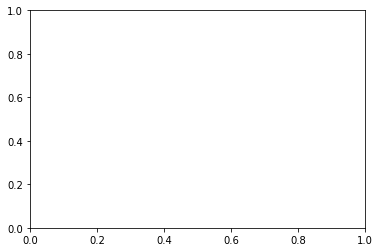

In [3]:
whatever1 = plt.axes()

In [4]:
whatever2 = plt.figure()

<Figure size 432x288 with 0 Axes>

In [5]:
x = np.linspace(0, 10, 100000)

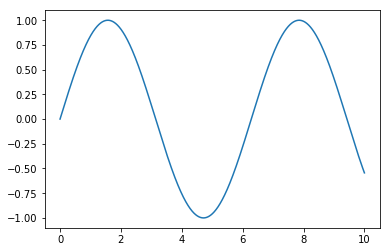

In [6]:
plt.plot(x, np.sin(x))
#plt.plot(x, np.cos(x));
#plt.xlim(-10, 30)
#plt.ylim(-2.5, 2.5)

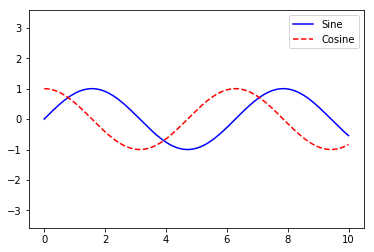

In [7]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

In [8]:
from collections import namedtuple
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [9]:
# some parameters we will need
#odeint?
x0 = 10
y0 = 2
alpha = 1
beta = 0.1
delta = 0.075
gamma = 1.5
Coeffs = namedtuple('coeffs', ['alpha', 'beta', 'delta', 'gamma'])
coeffs = Coeffs(alpha=alpha, beta=beta, delta=delta, gamma=gamma)

In [10]:
def dX_dt(X, t, coeffs):
    
    alpha, beta, delta, gamma = coeffs
    x, y = X
    dx_dt = alpha * x - beta * x * y
    dy_dt = delta * x * y - gamma * y
    
    return np.array([dx_dt, dy_dt])

In [11]:
X0 = np.array([x0, y0])
t = np.linspace(0, 15, 200)
X = odeint(dX_dt, X0, t, args=(coeffs,))
x, y = X.T
print(t[:3], x[:3], y[:3])

[0.         0.07537688 0.15075377] [10.         10.62592145 11.29956972] [2.         1.89337696 1.7990321 ]


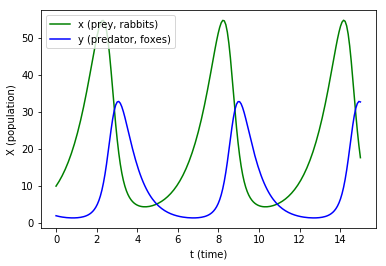

In [12]:
# a picture is worth a thousand words
fig, ax = plt.subplots()
ax.plot(t, x, color='green', label='x (prey, rabbits)')
ax.plot(t, y, color='blue', label='y (predator, foxes)')
ax.set_xlabel('t (time)')
ax.set_ylabel('X (population)')
ax.legend()

In [13]:
# put the solve-plot-part in a function...
def solve_fox_rabbit(x0=10, y0=1/2, 
                     alpha=1, beta=0.1, delta=0.075, gamma=1.5):

    coeffs = Coeffs(alpha=alpha, beta=beta, delta=delta, gamma=gamma)

    X0 = np.array([x0, y0])
    t = np.linspace(0, 15, 300)
    X = odeint(dX_dt, X0, t, args=(coeffs, ))
    x, y = X.T

    fig, ax = plt.subplots()
    ax.plot(t, x, color='green', label='x (prey, rabbits)')
    ax.plot(t, y, color='blue', label='y (predator, foxes)')
    ax.set_ylim([0, 50])
    ax.set_xlabel('t (time)')
    ax.set_ylabel('X (population)')
    ax.legend()

[]

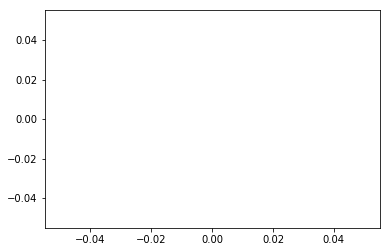

In [14]:
plt.plot()

In [15]:
iris.feature_names

NameError: name 'iris' is not defined

In [ ]:
import warnings
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('data/wage.csv') # data borrowed from https://cran.r-project.org/web/packages/ISLR/index.html

In [ ]:
df.columns

In [ ]:
df.describe()[['age', 'wage']]

In [ ]:
fig, ax = plt.subplots()
df.plot.scatter(x='age', y='wage', title='wage ~ age', ax=ax);

In [ ]:
median_wage = df.groupby('age')['wage'].agg(np.median)
median_wage.plot.line(label='median')

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(y='wage', x='education', hue='race', data=df, ax=ax,
            order=sorted(df['education'].unique(), key=lambda x: x[0]))
ax.set_title('wage ~ education')

In [ ]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.1,
            cmap='Blues')
plt.colorbar();  # show color scale

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

In [ ]:
iris

In [ ]:
type(iris)

In [ ]:
iris.data.T

In [ ]:
iris.feature_names

In [ ]:
sns.set() #defaultcolors

In [ ]:
sns.set_style("whitegrid") # darkgrid, whitegrid, dark, white, and ticks
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)

In [ ]:
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

In [ ]:
sns.boxplot(data=data);

In [ ]:
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10, trim=True);

In [ ]:
sns.axes_style()

In [ ]:
current_palette = sns.color_palette() # There are six variations of the default theme: deep, muted, pastel, bright, dark, and colorblind.
sns.palplot(current_palette)

http://colorbrewer2.org/

https://blog.xkcd.com/2010/05/03/color-survey-results/

https://xkcd.com/color/rgb/

In [16]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="Blues")
sns.despine(left=True)

NameError: name 'data' is not defined

In [17]:
plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

NameError: name 'features' is not defined

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data)

D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
D:\Anaconda3\lib\site-packages\sklearn\datasets\base.py:242: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

In [19]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


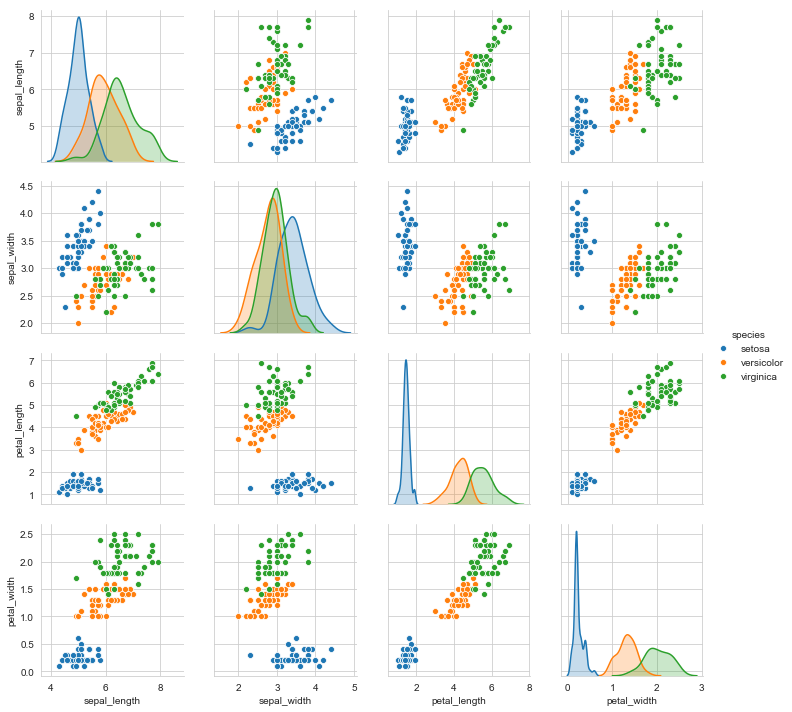

In [20]:
iris_sns = sns.load_dataset("iris")
sns.pairplot(iris_sns, hue="species", height=2.5);

In [21]:
iris_sns

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [22]:
sns.set_style('whitegrid')
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


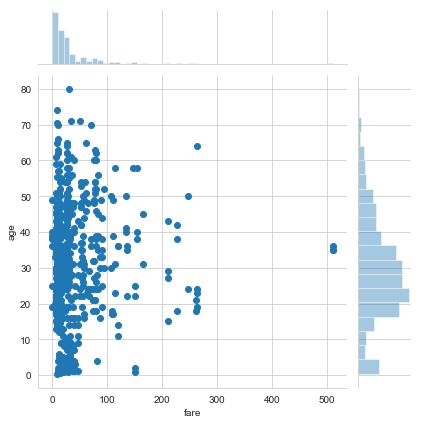

In [23]:
sns.jointplot(x='fare', y='age', data =titanic)

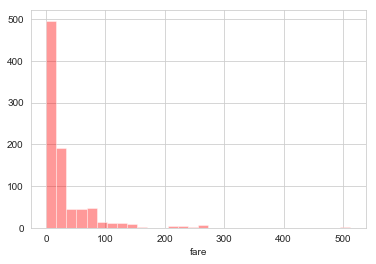

In [24]:
sns.distplot(titanic['fare'], kde=False, color="red", bins=30); #bins and red = distplot

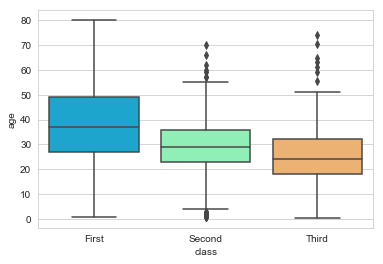

In [25]:
sns.boxplot(x="class", y="age", data=titanic, palette='rainbow');

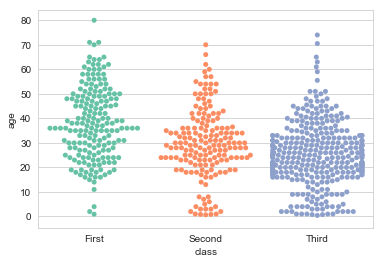

In [26]:
sns.swarmplot(x="class", y="age", data=titanic, palette='Set2');

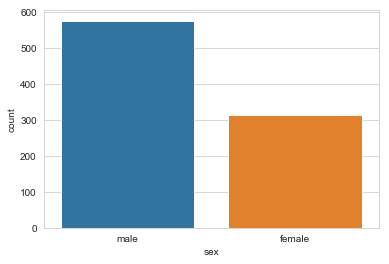

In [27]:
sns.countplot(x='sex', data=titanic);

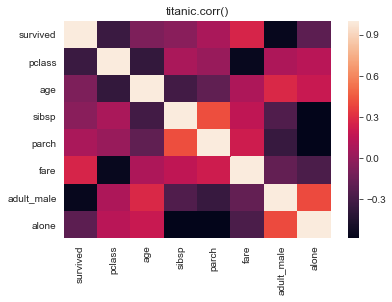

In [28]:
sns.heatmap(titanic.corr())
plt.title('titanic.corr()');

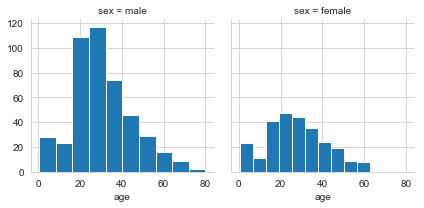

In [29]:
g = sns.FacetGrid(titanic, col='sex')
g = g.map(plt.hist, 'age')

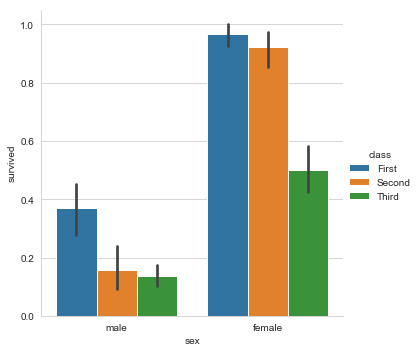

In [30]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

In [31]:
sns.set(color_codes=True)
tips = sns.load_dataset("tips")

In [32]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


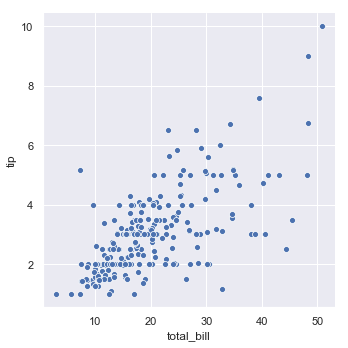

In [33]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

In [34]:
type(tips)

pandas.core.frame.DataFrame

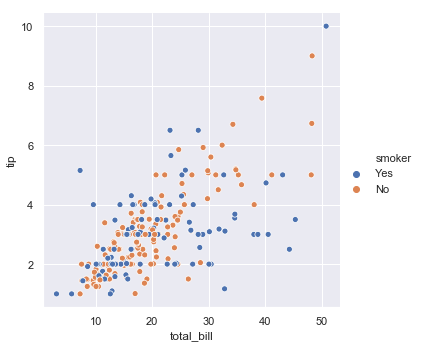

In [35]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

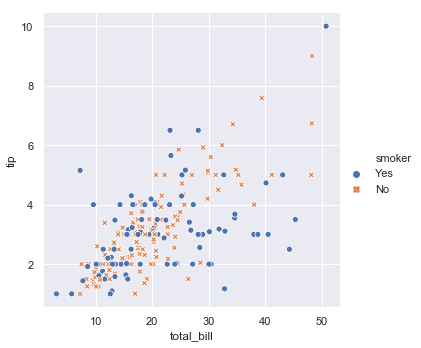

In [36]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips);

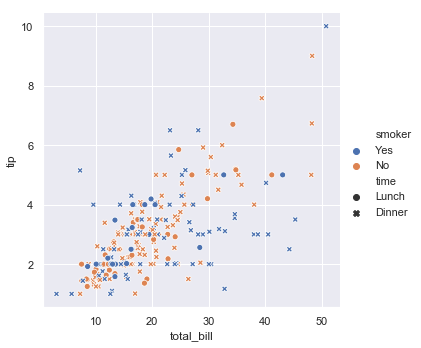

In [37]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

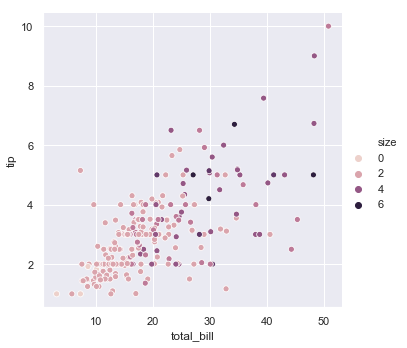

In [38]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

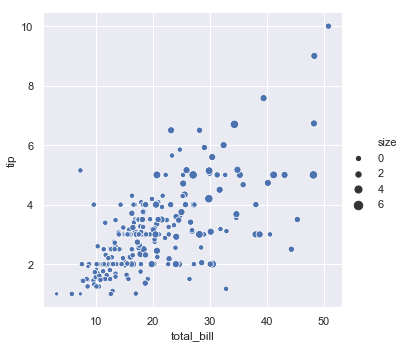

In [39]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

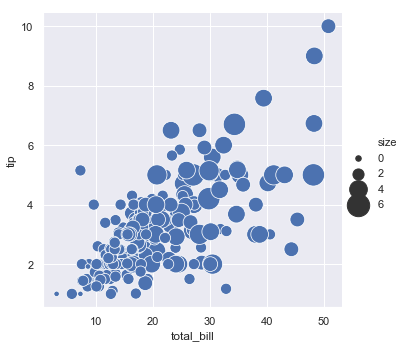

In [40]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(30, 500), data=tips);

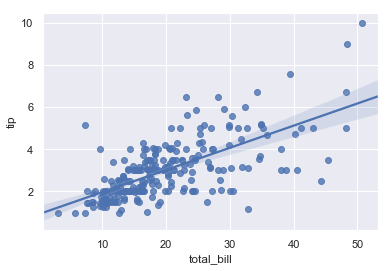

In [41]:
# Two main functions in seaborn are used to visualize a linear relationship as determined through regression. 
# These functions, regplot() and lmplot() are closely related, and share much of their core functionality.
# In the simplest invocation, both functions draw a scatterplot of two variables, x and y, 
# and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:
sns.regplot(x="total_bill", y="tip", data=tips);

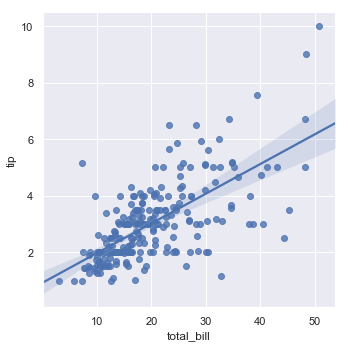

In [42]:
sns.lmplot(x="total_bill", y="tip", data=tips);

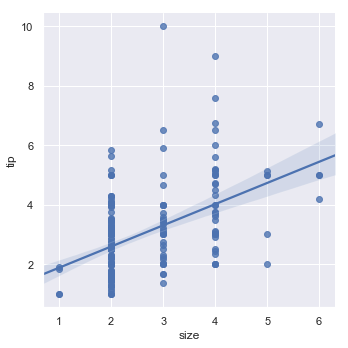

In [43]:
sns.lmplot(x="size", y="tip", data=tips);

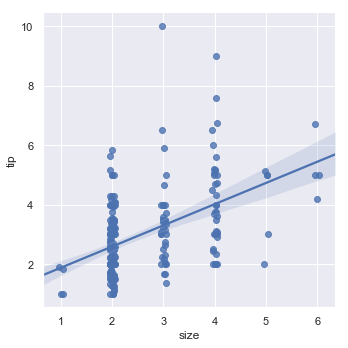

In [44]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

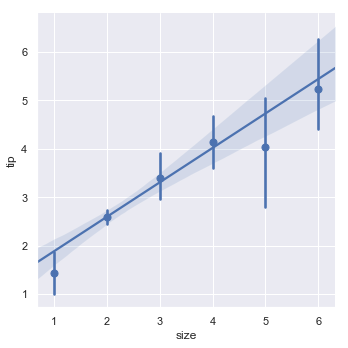

In [45]:
# collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

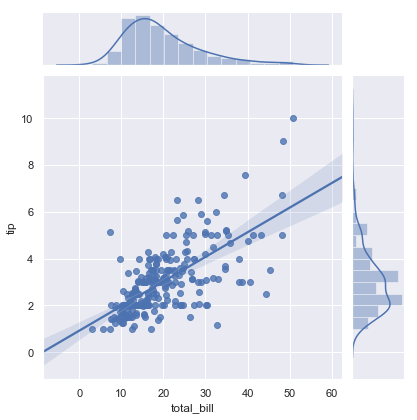

In [46]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

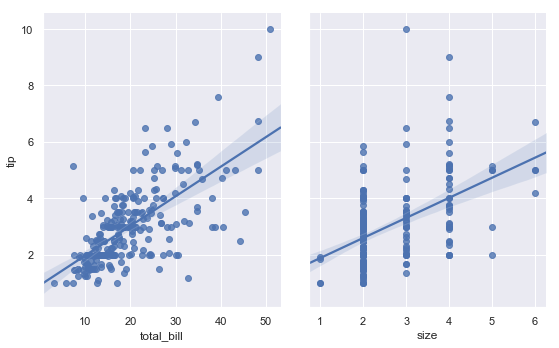

In [47]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg");

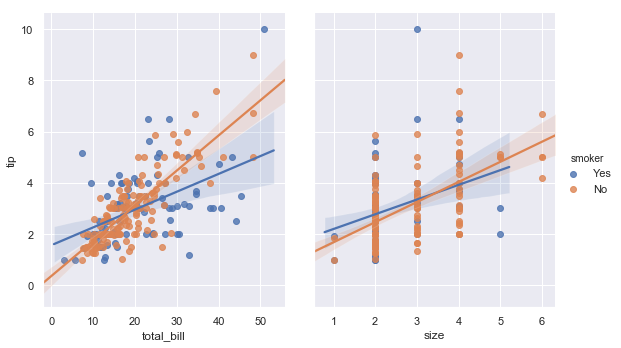

In [48]:
# Like lmplot(), but unlike jointplot(), conditioning on an additional categorical variable is built into pairplot() using the hue parameter
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg");

In [49]:
sns.set(style="ticks")

In [50]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


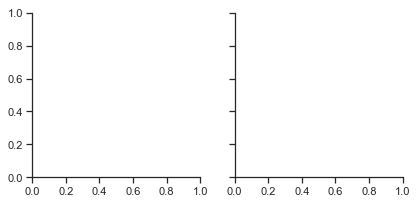

In [51]:
tips = sns.load_dataset("tips")

g = sns.FacetGrid(tips, col="time")

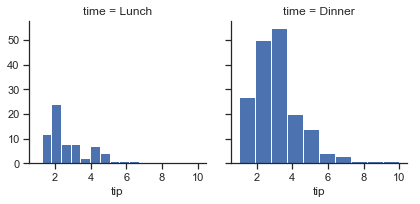

In [52]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip");

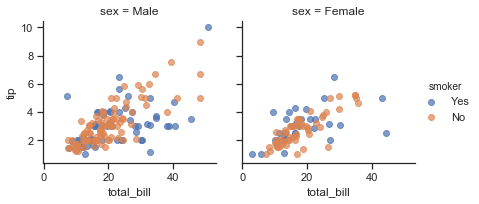

In [53]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

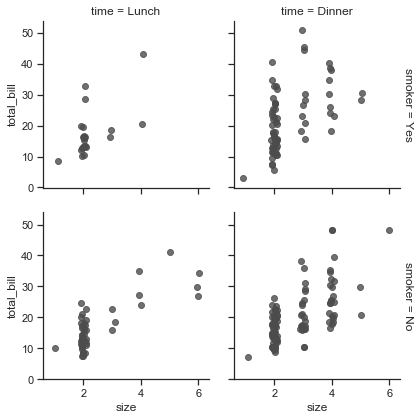

In [54]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);

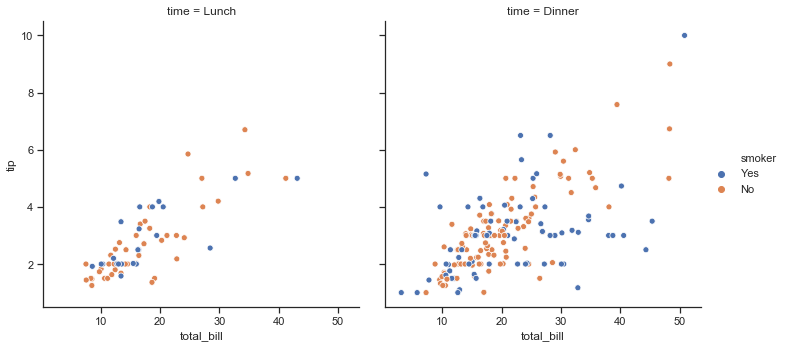

In [55]:
# Because relplot() is based on the FacetGrid, this is easy to do
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

In [56]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [57]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


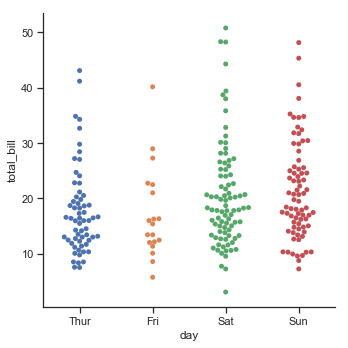

In [58]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

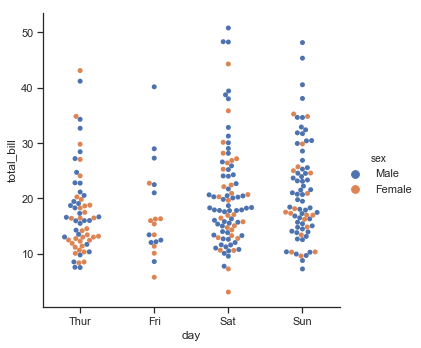

In [59]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

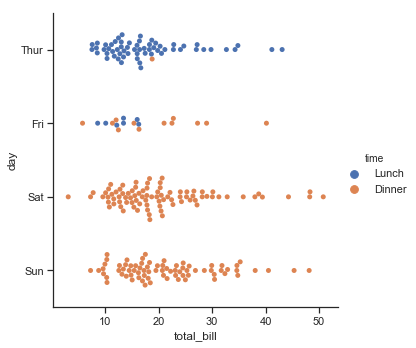

In [60]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

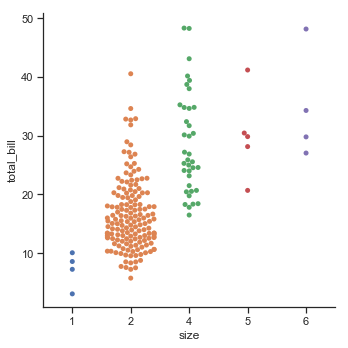

In [61]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"));

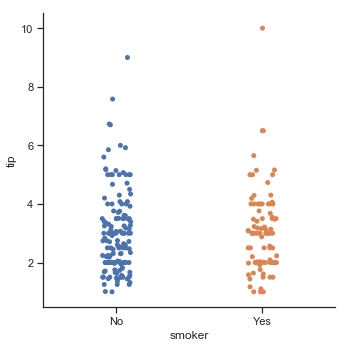

In [62]:
# The ordering can also be controlled on a plot-specific basis using the order parameter. 
# This can be important when drawing multiple categorical plots in the same figure, which we’ll see more of below
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

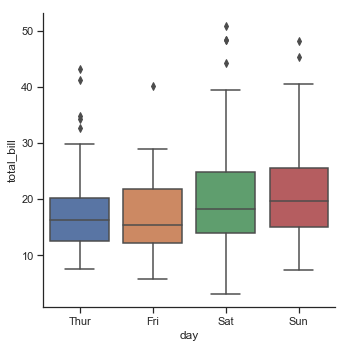

In [63]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

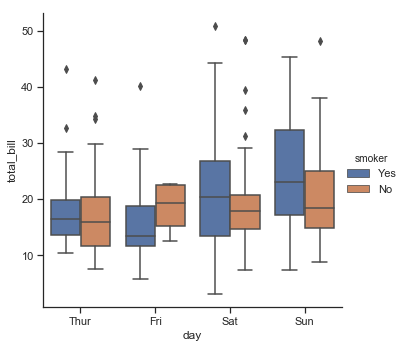

In [64]:
# When adding a hue semantic, 
# the box for each level of the semantic variable is moved along the categorical axis so they don’t overlap (dodging, dodge = True)
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

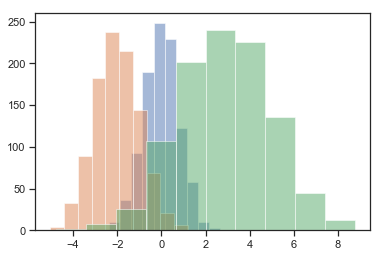

In [65]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

plt.hist(x1, alpha=0.5)
plt.hist(x2, alpha=0.5)
plt.hist(x3, alpha=0.5);

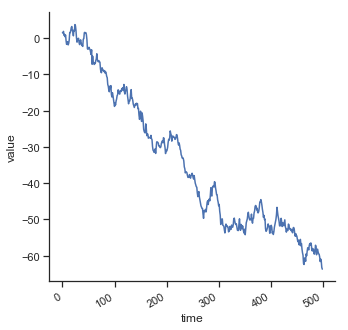

In [66]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

In [67]:
type(df)

pandas.core.frame.DataFrame

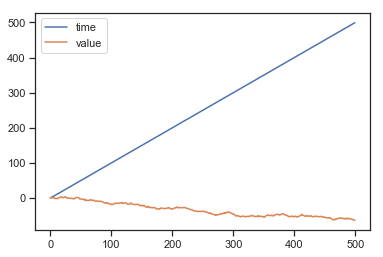

In [68]:
df.plot()

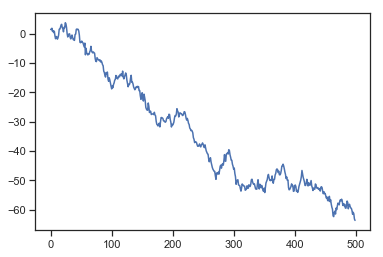

In [69]:
df.value.plot()

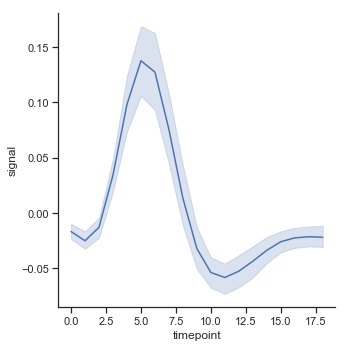

In [70]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

In [71]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


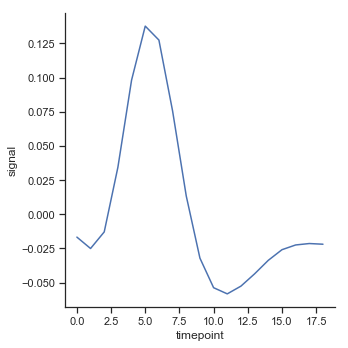

In [72]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

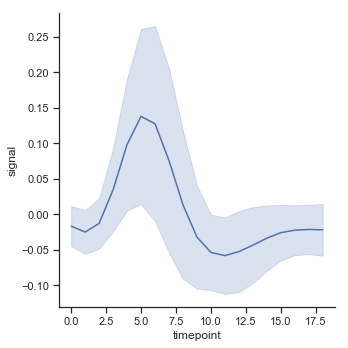

In [73]:
# Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting
# the standard deviation instead of a confidence interval:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

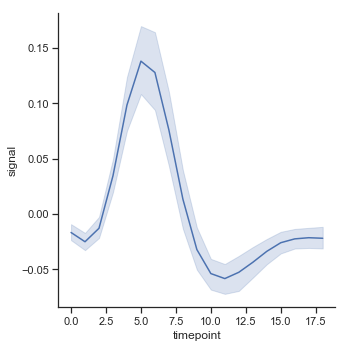

In [74]:
sns.relplot(x="timepoint", y="signal", kind="line",data=fmri);

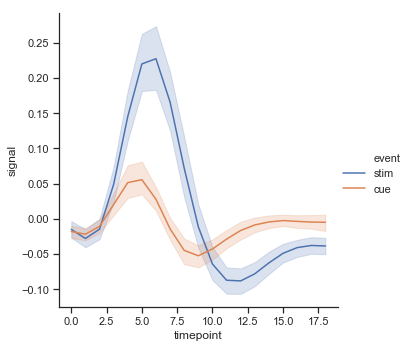

In [75]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

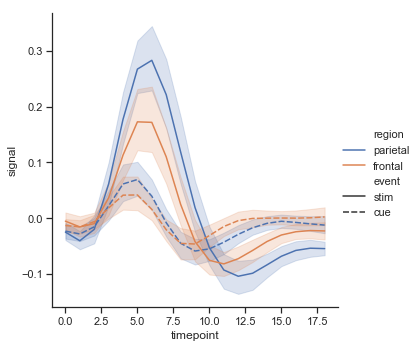

In [76]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

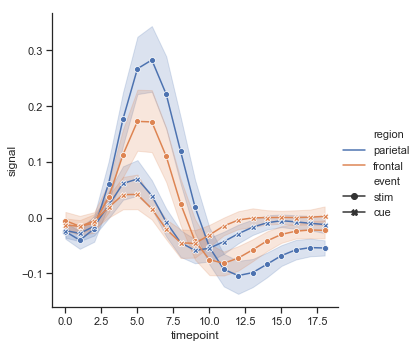

In [77]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

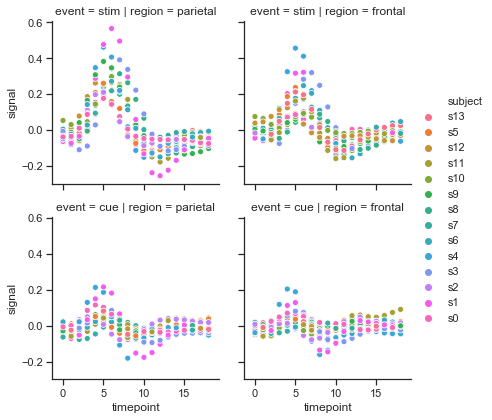

In [78]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3, data=fmri);

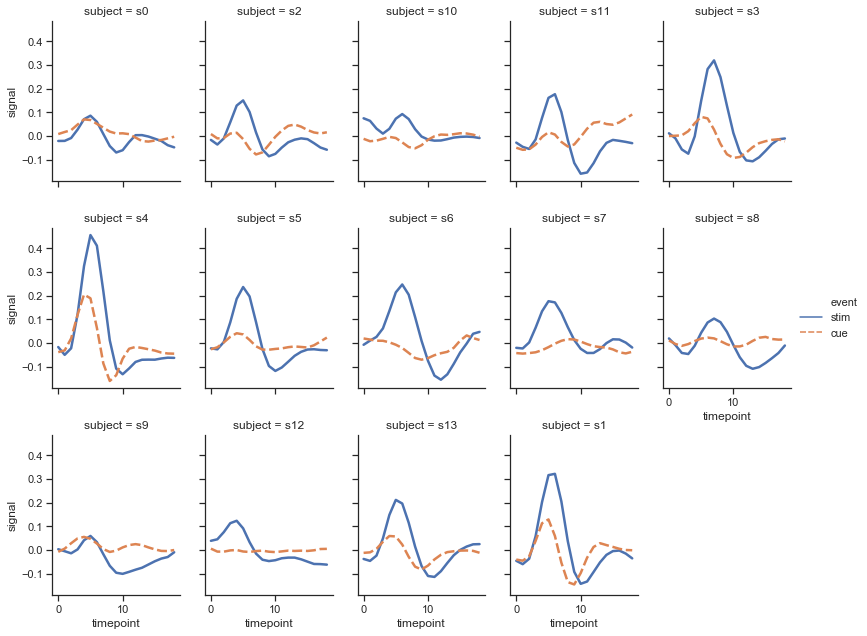

In [79]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

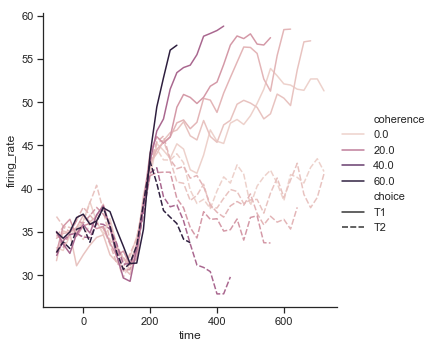

In [80]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

In [81]:
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


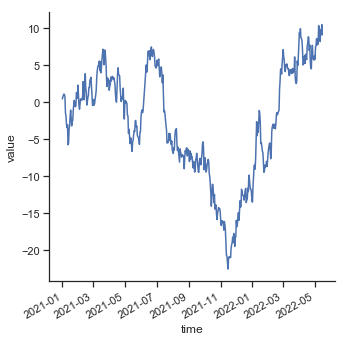

In [82]:
df = pd.DataFrame(dict(time=pd.date_range("2021-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

In [83]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [84]:
fp = flights.pivot_table(index='month',columns='year',values='passengers') # turning flights table into matrix form
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


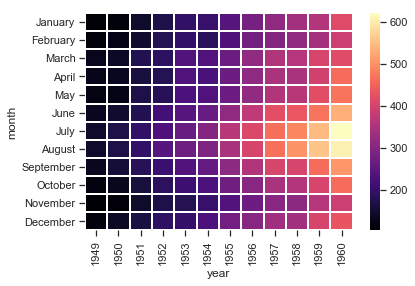

In [85]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths = 1);

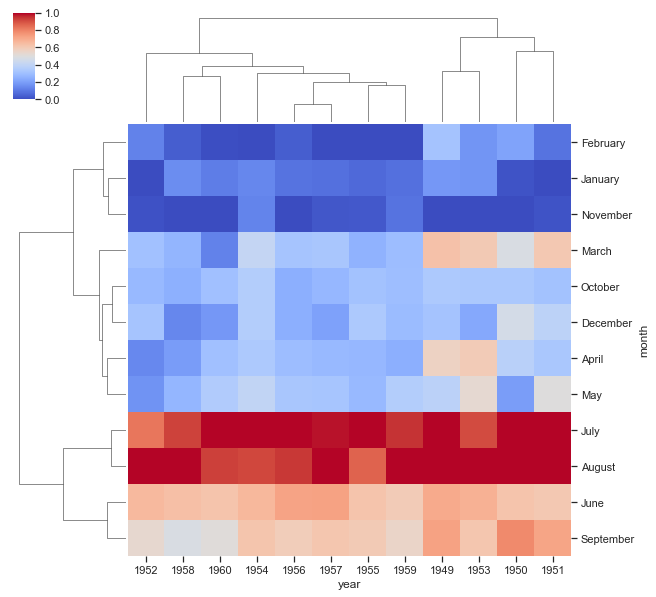

In [86]:
# uses hierarchal clustering to produce a clustered version of the heatmap.
sns.clustermap(fp,cmap='coolwarm',standard_scale=1); #cluster rows and columns together based on their similarity

In [87]:
sns.set_style('whitegrid')
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


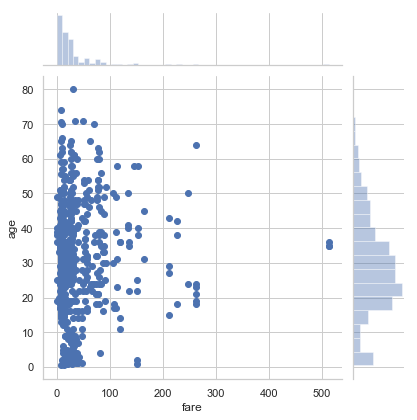

In [88]:
sns.jointplot(x='fare', y='age', data =titanic)

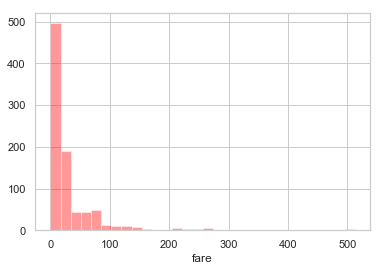

In [89]:
sns.distplot(titanic['fare'], kde=False, color="red", bins=30); #bins and red = distplot

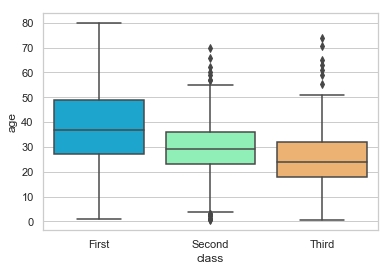

In [90]:
sns.boxplot(x="class", y="age", data=titanic, palette='rainbow');

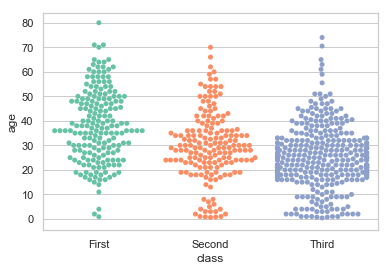

In [91]:
sns.swarmplot(x="class", y="age", data=titanic, palette='Set2');